In [3]:
### Mount Notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# change the working directory to the Drive root
%cd /content/drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [2]:
!pip install --quiet gradio
!pip install --quiet requests
!pip install --quiet langchain langchain-community langchain-core langchain-google-genai langchain-huggingface langchain-groq langchain-tavily langchain-chroma langgraph
!pip install --quiet huggingface_hub
!pip install --quiet supabase
!pip install --quiet arxiv
!pip install --quiet pymupdf
!pip install --quiet wikipedia
!pip install --quiet pgvector
!pip install --quiet python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.5/438.5 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.6/129.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.4 MB/s eta 0:00

### Question data

In [11]:
# Load metadata.jsonl
import json
# Load the metadata.jsonl file
with open('metadata.jsonl', 'r') as jsonl_file:
    json_list = list(jsonl_file)

json_QA = []
for json_str in json_list:
    json_data = json.loads(json_str)
    json_QA.append(json_data)

In [13]:
# randomly select 3 samples
# {"task_id": "c61d22de-5f6c-4958-a7f6-5e9707bd3466", "Question": "A paper about AI regulation that was originally submitted to arXiv.org in June 2022 shows a figure with three axes, where each axis has a label word at both ends. Which of these words is used to describe a type of society in a Physics and Society article submitted to arXiv.org on August 11, 2016?", "Level": 2, "Final answer": "egalitarian", "file_name": "", "Annotator Metadata": {"Steps": "1. Go to arxiv.org and navigate to the Advanced Search page.\n2. Enter \"AI regulation\" in the search box and select \"All fields\" from the dropdown.\n3. Enter 2022-06-01 and 2022-07-01 into the date inputs, select \"Submission date (original)\", and submit the search.\n4. Go through the search results to find the article that has a figure with three axes and labels on each end of the axes, titled \"Fairness in Agreement With European Values: An Interdisciplinary Perspective on AI Regulation\".\n5. Note the six words used as labels: deontological, egalitarian, localized, standardized, utilitarian, and consequential.\n6. Go back to arxiv.org\n7. Find \"Physics and Society\" and go to the page for the \"Physics and Society\" category.\n8. Note that the tag for this category is \"physics.soc-ph\".\n9. Go to the Advanced Search page.\n10. Enter \"physics.soc-ph\" in the search box and select \"All fields\" from the dropdown.\n11. Enter 2016-08-11 and 2016-08-12 into the date inputs, select \"Submission date (original)\", and submit the search.\n12. Search for instances of the six words in the results to find the paper titled \"Phase transition from egalitarian to hierarchical societies driven by competition between cognitive and social constraints\", indicating that \"egalitarian\" is the correct answer.", "Number of steps": "12", "How long did this take?": "8 minutes", "Tools": "1. Web browser\n2. Image recognition tools (to identify and parse a figure with three axes)", "Number of tools": "2"}}

import random
# random.seed(42)
random_samples = random.sample(json_QA, 1)
for sample in random_samples:
    print("=" * 50)
    print(f"Task ID: {sample['task_id']}")
    print(f"Question: {sample['Question']}")
    print(f"Level: {sample['Level']}")
    print(f"Final Answer: {sample['Final answer']}")
    print(f"Annotator Metadata: ")
    print(f"  ├── Steps: ")
    for step in sample['Annotator Metadata']['Steps'].split('\n'):
        print(f"  │      ├── {step}")
    print(f"  ├── Number of steps: {sample['Annotator Metadata']['Number of steps']}")
    print(f"  ├── How long did this take?: {sample['Annotator Metadata']['How long did this take?']}")
    print(f"  ├── Tools:")
    for tool in sample['Annotator Metadata']['Tools'].split('\n'):
        print(f"  │      ├── {tool}")
    print(f"  └── Number of tools: {sample['Annotator Metadata']['Number of tools']}")
print("=" * 50)

Task ID: 2a649bb1-795f-4a01-b3be-9a01868dae73
Question: What are the EC numbers of the two most commonly used chemicals for the virus testing method in the paper about SPFMV and SPCSV in the Pearl Of Africa from 2016? Return the semicolon-separated numbers in the order of the alphabetized chemicals.
Level: 2
Final Answer: 3.1.3.1; 1.11.1.7
Annotator Metadata: 
  ├── Steps: 
  │      ├── 1. Searched "Pearl of Africa" on Google.
  │      ├── 2. Noted the answer from the results.
  │      ├── 3. Searched "SPFMV and SPCSV in Uganda 2016 paper" on Google.
  │      ├── 4. Opened "Effects of Sweet Potato Feathery Mottle Virus and ..." at https://onlinelibrary.wiley.com/doi/full/10.1111/jph.12451.
  │      ├── 5. Found the section on virus testing.
  │      ├── 6. Searched "most commonly used chemicals for ELISA" on Google.
  │      ├── 7. Noted horseradish peroxidase and alkaline phosphatase from the results.
  │      ├── 8. Searched "horseradish peroxidase EC number" on Google.
  │      ├── 

In [8]:
### build a vector database based on the metadata.jsonl
# https://python.langchain.com/docs/integrations/vectorstores/supabase/
import os
from dotenv import load_dotenv
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import SupabaseVectorStore
from supabase.client import Client, create_client


load_dotenv(override=True)
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2") #  dim=768

supabase_url = os.environ.get("SUPABASE_URL")
supabase_key = os.environ.get("SUPABASE_SERVICE_KEY")
supabase: Client = create_client(supabase_url, supabase_key)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [30]:
# wrap the metadata.jsonl's questions and answers into a list of document
from langchain.schema import Document
docs = []
for sample in json_QA:
    content = f"Question : {sample['Question']}\n\nFinal answer : {sample['Final answer']}"
    doc = {
        "content" : content,
        "metadata" : {
            "source" : sample['task_id']
        },
        "embedding" : embeddings.embed_query(content),
    }
    docs.append(doc)

you have created a match_documents function in your database
you have a documents table in your public schema similar to the one below.


```PostgreSQL
-- Enable the pgvector extension to work with embedding vectors
create extension if not exists vector;

-- Create a table to store your documents
create table
  documents (
    id int8,
    content text, -- corresponds to Document.pageContent
    metadata jsonb, -- corresponds to Document.metadata
    embedding vector
  );
```

In [36]:
# upload the documents to the vector database(you need to set up a documents table in the supabase first!)
try:
    response = (
        supabase.table("documents")
        .insert(docs)
        .execute()
    )
except Exception as exception:
    print("Error inserting data into Supabase:", exception)

In [20]:
# ALTERNATIVE : Save the documents (a list of dict) into a csv file, and manually upload it to Supabase
import pandas as pd
df = pd.DataFrame(docs)
df.to_csv('supabase_docs.csv', index=False)

In [51]:
# add items to vector database
vector_store = SupabaseVectorStore(
    client=supabase,
    embedding= embeddings,
    table_name="documents",
    query_name="match_documents_langchain",
)
retriever = vector_store.as_retriever()

```PostgreSQL
-- Create a function to search for documents

CREATE OR REPLACE FUNCTION match_documents_langchain(query_embedding vector)
RETURNS TABLE (
    id int8,
    content text,
    metadata jsonb,
    similarity double precision
) AS $$
BEGIN
    RETURN QUERY
    SELECT
        documents.id, -- Explicitly qualify the column with the table name
        documents.content,
        documents.metadata,
        (documents.embedding <=> query_embedding) AS similarity
    FROM documents
    ORDER BY similarity ASC
    LIMIT 1; -- Adjust the limit as needed
END;
$$ LANGUAGE plpgsql;
```

In [56]:
query = "On June 6, 2023, an article by Carolyn Collins Petersen was published in Universe Today. This article mentions a team that produced a paper about their observations, linked at the bottom of the article. Find this paper. Under what NASA award number was the work performed by R. G. Arendt supported by?"
#matched_docs = vector_store.similarity_search(query, 2)
docs = retriever.invoke(query)
docs[0]

Document(metadata={'source': '840bfca7-4f7b-481a-8794-c560c340185d'}, page_content='Question : On June 6, 2023, an article by Carolyn Collins Petersen was published in Universe Today. This article mentions a team that produced a paper about their observations, linked at the bottom of the article. Find this paper. Under what NASA award number was the work performed by R. G. Arendt supported by?\n\nFinal answer : 80GSFC21M0002')

In [57]:
# list of the tools used in all the samples
from collections import Counter, OrderedDict

tools = []
for sample in json_QA:
    for tool in sample['Annotator Metadata']['Tools'].split('\n'):
        tool = tool[2:].strip().lower()
        if tool.startswith("("):
            tool = tool[11:].strip()
        tools.append(tool)
tools_counter = OrderedDict(Counter(tools))
print("List of tools used in all samples:")
print("Total number of tools used:", len(tools_counter))
for tool, count in tools_counter.items():
    print(f"  ├── {tool}: {count}")

List of tools used in all samples:
Total number of tools used: 83
  ├── web browser: 107
  ├── image recognition tools (to identify and parse a figure with three axes): 1
  ├── search engine: 101
  ├── calculator: 34
  ├── unlambda compiler (optional): 1
  ├── a web browser.: 2
  ├── a search engine.: 2
  ├── a calculator.: 1
  ├── microsoft excel: 5
  ├── google search: 1
  ├── ne: 9
  ├── pdf access: 7
  ├── file handling: 2
  ├── python: 3
  ├── image recognition tools: 12
  ├── jsonld file access: 1
  ├── video parsing: 1
  ├── python compiler: 1
  ├── video recognition tools: 3
  ├── pdf viewer: 7
  ├── microsoft excel / google sheets: 3
  ├── word document access: 1
  ├── tool to extract text from images: 1
  ├── a word reversal tool / script: 1
  ├── counter: 1
  ├── excel: 3
  ├── image recognition: 5
  ├── color recognition: 3
  ├── excel file access: 3
  ├── xml file access: 1
  ├── access to the internet archive, web.archive.org: 1
  ├── text processing/diff tool: 1
  ├── gi

#### Graph

In [58]:
system_prompt = """
You are a helpful assistant tasked with answering questions using a set of tools.
If the tool is not available, you can try to find the information online. You can also use your own knowledge to answer the question.
You need to provide a step-by-step explanation of how you arrived at the answer.
==========================
Here is a few examples showing you how to answer the question step by step.
"""
for i, samples in enumerate(random_samples):
    system_prompt += f"\nQuestion {i+1}: {samples['Question']}\nSteps:\n{samples['Annotator Metadata']['Steps']}\nTools:\n{samples['Annotator Metadata']['Tools']}\nFinal Answer: {samples['Final answer']}\n"
system_prompt += "\n==========================\n"
system_prompt += "Now, please answer the following question step by step.\n"

# save the system_prompt to a file
with open('system_prompt.txt', 'w') as f:
    f.write(system_prompt)

In [59]:
# load the system prompt from the file
with open('system_prompt.txt', 'r') as f:
    system_prompt = f.read()
print(system_prompt)


You are a helpful assistant tasked with answering questions using a set of tools.
If the tool is not available, you can try to find the information online. You can also use your own knowledge to answer the question. 
You need to provide a step-by-step explanation of how you arrived at the answer.
Here is a few examples showing you how to answer the question step by step.

Question 1: What are the EC numbers of the two most commonly used chemicals for the virus testing method in the paper about SPFMV and SPCSV in the Pearl Of Africa from 2016? Return the semicolon-separated numbers in the order of the alphabetized chemicals.
Steps:
1. Searched "Pearl of Africa" on Google.
2. Noted the answer from the results.
3. Searched "SPFMV and SPCSV in Uganda 2016 paper" on Google.
4. Opened "Effects of Sweet Potato Feathery Mottle Virus and ..." at https://onlinelibrary.wiley.com/doi/full/10.1111/jph.12451.
5. Found the section on virus testing.
6. Searched "most commonly used chemicals for ELISA

In [89]:
import dotenv
from langgraph.graph import MessagesState, START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.document_loaders import WikipediaLoader
from langchain_community.document_loaders import ArxivLoader
from langchain_community.vectorstores import SupabaseVectorStore
from langchain.tools.retriever import create_retriever_tool
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.tools import tool
from supabase.client import Client, create_client

# Define the retriever from supabase
load_dotenv()
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2") #  dim=768

supabase_url = os.environ.get("SUPABASE_URL")
supabase_key = os.environ.get("SUPABASE_SERVICE_KEY")
supabase: Client = create_client(supabase_url, supabase_key)
vector_store = SupabaseVectorStore(
    client=supabase,
    embedding= embeddings,
    table_name="documents",
    query_name="match_documents_langchain",
)

retrieve_tool = create_retriever_tool(
    vector_store.as_retriever(),
    "Question Retriever",
    "Find similar questions in the vector database for the given question.",
)

@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers.

    Args:
        a: first int
        b: second int
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """Add two numbers.

    Args:
        a: first int
        b: second int
    """
    return a + b

@tool
def subtract(a: int, b: int) -> int:
    """Subtract two numbers.

    Args:
        a: first int
        b: second int
    """
    return a - b

@tool
def divide(a: int, b: int) -> int:
    """Divide two numbers.

    Args:
        a: first int
        b: second int
    """
    if b == 0:
        raise ValueError("Cannot divide by zero.")
    return a / b

@tool
def modulus(a: int, b: int) -> int:
    """Get the modulus of two numbers.

    Args:
        a: first int
        b: second int
    """
    return a % b

@tool
def wiki_search(query: str) -> str:
    """Search Wikipedia for a query and return maximum 2 results.

    Args:
        query: The search query."""
    search_docs = WikipediaLoader(query=query, load_max_docs=2).load()
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ])
    return {"wiki_results": formatted_search_docs}

@tool
def web_search(query: str) -> str:
    """Search Tavily for a query and return maximum 3 results.

    Args:
        query: The search query."""
    search_docs = TavilySearchResults(max_results=3).invoke(query=query)
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ])
    return {"web_results": formatted_search_docs}

@tool
def arvix_search(query: str) -> str:
    """Search Arxiv for a query and return maximum 3 result.

    Args:
        query: The search query."""
    search_docs = ArxivLoader(query=query, load_max_docs=3).load()
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content[:1000]}\n</Document>'
            for doc in search_docs
        ])
    return {"arvix_results": formatted_search_docs}

@tool
def similar_search(question: str) -> str:
    """Search the vector database for similar questions and return the first results.

    Args:
        question: the question human provided."""
    matched_docs = vector_store.similarity_search(query, 3)
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content[:1000]}\n</Document>'
            for doc in matched_docs
        ])
    return {"similar_questions": formatted_search_docs}

tools = [
    multiply,
    add,
    subtract,
    divide,
    modulus,
    wiki_search,
    web_search,
    arvix_search,
    similar_search,
    #retrieve_tool
]

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
llm_with_tools = llm.bind_tools(tools)

In [85]:
# load the system prompt from the file
with open('system_prompt.txt', 'r') as f:
    system_prompt = f.read()


# System message
sys_msg = SystemMessage(content=system_prompt)

# Node
def assistant(state: MessagesState):
    """Assistant node"""
    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")

# Compile graph
graph = builder.compile()


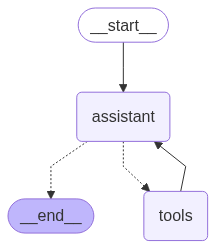

In [86]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [90]:
question = "What is your name?"
messages = [HumanMessage(content=question)]
messages = graph.invoke({"messages": messages})

In [91]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is your name?
================================== Ai Message ==================================

I am Gemini, a large language model built by Google.
